In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import numpy as np
import json
import warnings
warnings.filterwarnings('ignore')
import base64
import io
from scipy.misc import imread
import codecs
from IPython.display import HTML

In [2]:
movies=pd.read_csv('G:\\git_projects\\movie_recommendation\\Dataset\\tmdb_5000_movies.csv')
mov=pd.read_csv('G:\\git_projects\\movie_recommendation\\Dataset\\tmdb_5000_credits.csv')

In [3]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [5]:


# changing the genres column from json to string
movies['genres']=movies['genres'].apply(json.loads)
for index,i in zip(movies.index,movies['genres']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))# the key 'name' contains the name of the genre
    movies.loc[index,'genres']=str(list1)
    
# changing the keywords column from json to string
movies['keywords']=movies['keywords'].apply(json.loads)
for index,i in zip(movies.index,movies['keywords']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'keywords']=str(list1)
    
## changing the production_companies column from json to string
movies['production_companies']=movies['production_companies'].apply(json.loads)
for index,i in zip(movies.index,movies['production_companies']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'production_companies']=str(list1)
    
# changing the production_countries column from json to string    
movies['production_countries']=movies['production_countries'].apply(json.loads)
for index,i in zip(movies.index,movies['production_countries']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'production_countries']=str(list1)
    
# changing the cast column from json to string
mov['cast']=mov['cast'].apply(json.loads)
for index,i in zip(mov.index,mov['cast']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    mov.loc[index,'cast']=str(list1)

# changing the crew column from json to string    
mov['crew']=mov['crew'].apply(json.loads)
def director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
mov['crew']=mov['crew'].apply(director)
mov.rename(columns={'crew':'director'},inplace=True)



In [6]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...","['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"['Adventure', 'Fantasy', 'Action']",http://disney.go.com/disneypictures/pirates/,285,"['ocean', 'drug abuse', 'exotic island', 'east...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...",['United States of America'],2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"['Action', 'Adventure', 'Crime']",http://www.sonypictures.com/movies/spectre/,206647,"['spy', 'based on novel', 'secret agent', 'seq...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"['Columbia Pictures', 'Danjaq', 'B24']","['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",http://www.thedarkknightrises.com/,49026,"['dc comics', 'crime fighter', 'terrorist', 's...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"['Legendary Pictures', 'Warner Bros.', 'DC Ent...",['United States of America'],2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"['Action', 'Adventure', 'Science Fiction']",http://movies.disney.com/john-carter,49529,"['based on novel', 'mars', 'medallion', 'space...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,['Walt Disney Pictures'],['United States of America'],2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [7]:
# merging the two csv files
movies=movies.merge(mov,left_on='id',right_on='movie_id',how='left')

In [8]:
movies=movies[['id','original_title','genres','cast','vote_average','director','keywords']]

In [9]:
#converting to list
movies['genres']=movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['genres']=movies['genres'].str.split(',')

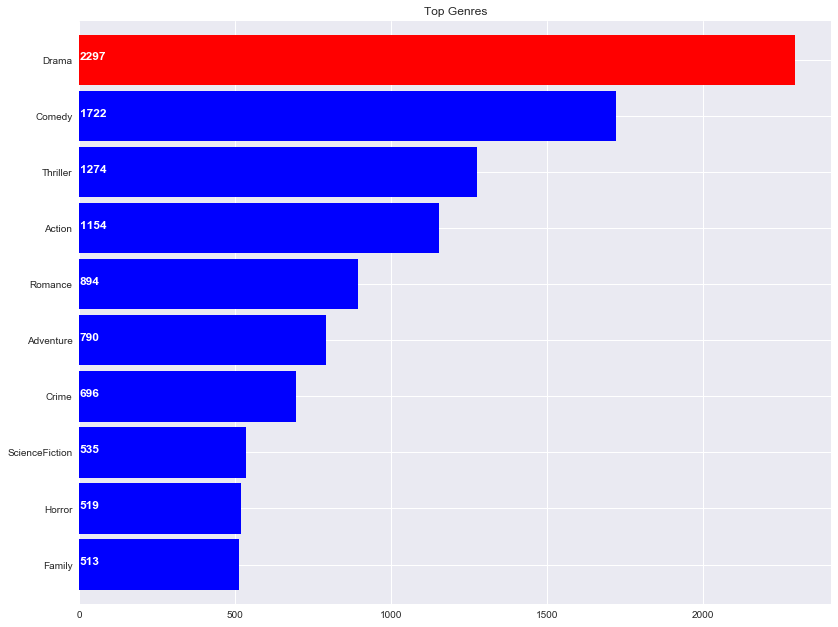

In [10]:
plt.subplots(figsize=(12,10))
list1=[]
for i in movies['genres']:
    list1.extend(i)
ax=pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color='blue')
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
ax.patches[9].set_facecolor('r')
plt.title('Top Genres')
plt.show()

In [11]:
for i,j in zip(movies['genres'],movies.index):
    list2=[]
    list2=i
    list2.sort()
    movies.loc[j,'genres']=str(list2)
movies['genres']=movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['genres']=movies['genres'].str.split(',')

In [12]:
#generate a genre list
genreList = []
for index, row in movies.iterrows():
    genres = row["genres"]
    
    for genre in genres:
        if genre not in genreList:
            genreList.append(genre)

In [13]:
#now we have a list with unique genres
genreList[:10]

['Action',
 'Adventure',
 'Fantasy',
 'ScienceFiction',
 'Crime',
 'Drama',
 'Thriller',
 'Animation',
 'Family',
 'Western']

In [14]:
#making the binary lists
def binary(genre_list):
    binaryList = []
    
    for genre in genreList:
        if genre in genre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [15]:
movies['genres_bin'] = movies['genres'].apply(lambda x: binary(x))

In [16]:
movies['genres_bin'].head(4)

0    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: genres_bin, dtype: object

In [17]:
movies['cast']=movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
movies['cast']=movies['cast'].str.split(',')

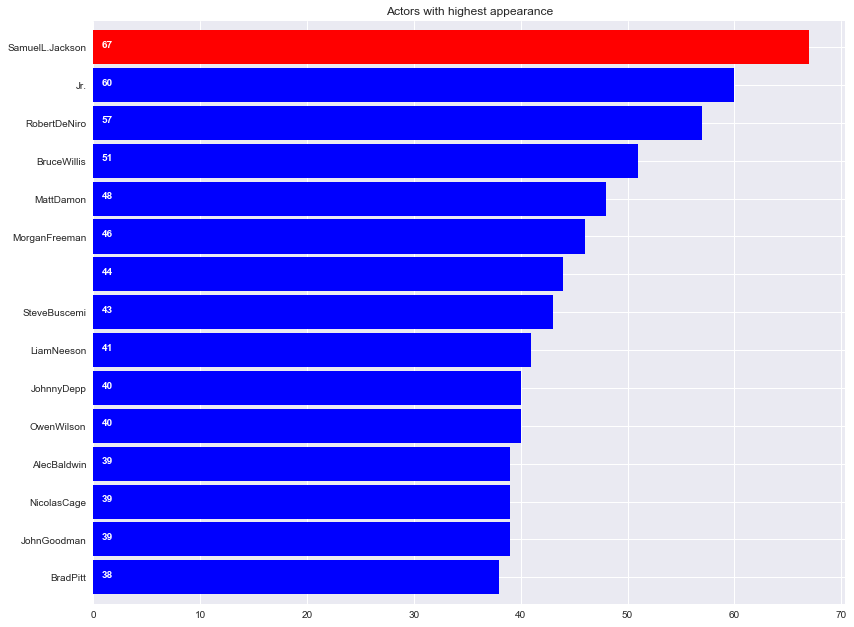

In [18]:
plt.subplots(figsize=(12,10))
list1=[]
for i in movies['cast']:
    list1.extend(i)
ax=pd.Series(list1).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color='blue')
for i, v in enumerate(pd.Series(list1).value_counts()[:15].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='white',weight='bold')
plt.title('Actors with highest appearance')
ax.patches[14].set_facecolor('r')
plt.show()

In [19]:
for i,j in zip(movies['cast'],movies.index):
    list2=[]
    list2=i[:4]
    movies.loc[j,'cast']=str(list2)
movies['cast']=movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['cast']=movies['cast'].str.split(',')
for i,j in zip(movies['cast'],movies.index):
    list2=[]
    list2=i
    list2.sort()
    movies.loc[j,'cast']=str(list2)
movies['cast']=movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['cast']=movies['cast'].str.split(',')

In [20]:
castList = []
for index, row in movies.iterrows():
    cast = row["cast"]
    
    for i in cast:
        if i not in castList:
            castList.append(i)

In [21]:
def binary(cast_list):
    binaryList = []
    
    for genre in castList:
        if genre in cast_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [22]:
movies['cast_bin'] = movies['cast'].apply(lambda x: binary(x))

In [23]:
movies['cast_bin'].head(2) #binary list for actors in the movie

0    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...
Name: cast_bin, dtype: object

In [24]:
def xstr(s):
    if s is None:
        return ''
    return str(s)
movies['director']=movies['director'].apply(xstr)

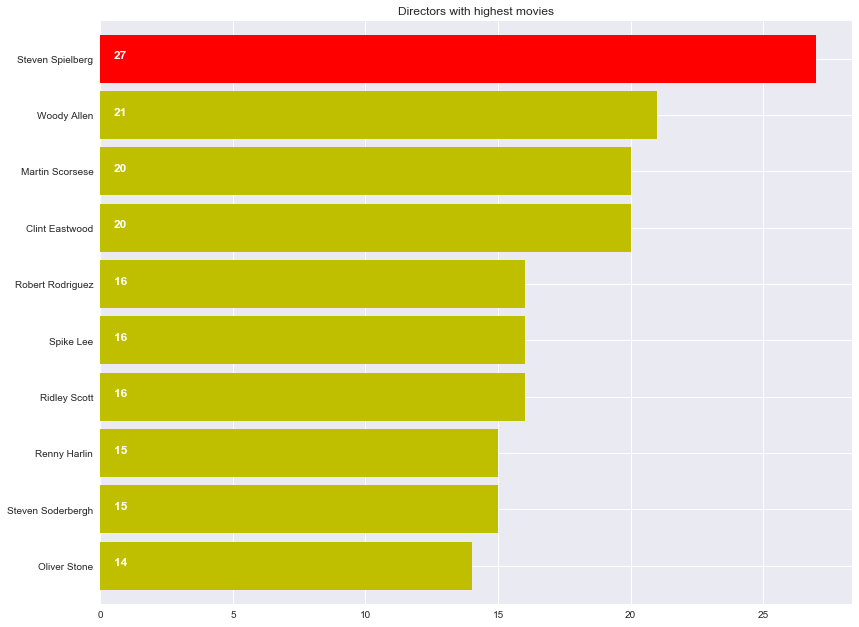

In [25]:
plt.subplots(figsize=(12,10))
ax=movies[movies['director']!=''].director.value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.85,color='y')
for i, v in enumerate(movies[movies['director']!=''].director.value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.5, i, v,fontsize=12,color='white',weight='bold')
ax.patches[9].set_facecolor('r')
plt.title('Directors with highest movies')
plt.show()

In [26]:
directorList=[]
for i in movies['director']:
    if i not in directorList:
        directorList.append(i)

In [27]:
def binary(director_list):
    binaryList = []
    
    for direct in directorList:
        if direct in director_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [28]:
movies['director_bin'] = movies['director'].apply(lambda x: binary(x))

In [29]:
mask=b'iVBORw0KGgoAAAANSUhEUgAAAgAAAAIACAYAAAD0eNT6AAAACXBIWXMAAAsTAAALEwEAmpwYAAAKT2lDQ1BQaG90b3Nob3AgSUNDIHByb2ZpbGUAAHjanVNnVFPpFj333vRCS4iAlEtvUhUIIFJCi4AUkSYqIQkQSoghodkVUcERRUUEG8igiAOOjoCMFVEsDIoK2AfkIaKOg6OIisr74Xuja9a89+bN/rXXPues852zzwfACAyWSDNRNYAMqUIeEeCDx8TG4eQuQIEKJHAAEAizZCFz/SMBAPh+PDwrIsAHvgABeNMLCADATZvAMByH/w/qQplcAYCEAcB0kThLCIAUAEB6jkKmAEBGAYCdmCZTAKAEAGDLY2LjAFAtAGAnf+bTAICd+Jl7AQBblCEVAaCRACATZYhEAGg7AKzPVopFAFgwABRmS8Q5ANgtADBJV2ZIALC3AMDOEAuyAAgMADBRiIUpAAR7AGDIIyN4AISZABRG8lc88SuuEOcqAAB4mbI8uSQ5RYFbCC1xB1dXLh4ozkkXKxQ2YQJhmkAuwnmZGTKBNA/g88wAAKCRFRHgg/P9eM4Ors7ONo62Dl8t6r8G/yJiYuP+5c+rcEAAAOF0ftH+LC+zGoA7BoBt/qIl7gRoXgugdfeLZrIPQLUAoOnaV/Nw+H48PEWhkLnZ2eXk5NhKxEJbYcpXff5nwl/AV/1s+X48/Pf14L7iJIEyXYFHBPjgwsz0TKUcz5IJhGLc5o9H/LcL//wd0yLESWK5WCoU41EScY5EmozzMqUiiUKSKcUl0v9k4t8s+wM+3zUAsGo+AXuRLahdYwP2SycQWHTA4vcAAPK7b8HUKAgDgGiD4c93/+8//UegJQCAZkmScQAAXkQkLlTKsz/HCAAARKCBKrBBG/TBGCzABhzBBdzBC/xgNoRCJMTCQhBCCmSAHHJgKayCQiiGzbAdKmAv1EAdNMBRaIaTcA4uwlW4Dj1wD/phCJ7BKLyBCQRByAgTYSHaiAFiilgjjggXmYX4IcFIBBKLJCDJiBRRIkuRNUgxUopUIFVIHfI9cgI5h1xGupE7yAAygvyGvEcxlIGyUT3UDLVDuag3GoRGogvQZHQxmo8WoJvQcrQaPYw2oefQq2gP2o8+Q8cwwOgYBzPEbDAuxsNCsTgsCZNjy7EirAyrxhqwVqwDu4n1Y8+xdwQSgUXACTYEd0IgYR5BSFhMWE7YSKggHCQ0EdoJNwkDhFHCJyKTqEu0JroR+cQYYjIxh1hILCPWEo8TLxB7iEPENyQSiUMyJ7mQAkmxpFTSEtJG0m5SI+ksqZs0SBojk8naZGuyBzmULCAryIXkneTD5DPkG+Qh8lsKnWJAcaT4U+IoUspqShnlEOU05QZlmDJBVaOaUt2ooVQRNY9aQq2htlKvUYeoEzR1mjnNgxZJS6WtopXTGmgXaPdpr+h0uhHdlR5Ol9BX0svpR+iX6AP0dwwNhhWDx4hnKBmbGAcYZxl3GK+YTKYZ04sZx1QwNzHrmOeZD5lvVVgqtip8FZHKCpVKlSaVGyovVKmqpqreqgtV81XLVI+pXlN9rkZVM1PjqQnUlqtVqp1Q61MbU2epO6iHqmeob1Q/pH5Z/YkGWcNMw09DpFGgsV/jvMYgC2MZs3gsIWsNq4Z1gTXEJrHN2Xx2KruY/R27iz2qqaE5QzNKM1ezUvOUZj8H45hx+Jx0TgnnKKeX836K3hTvKeIpG6Y0TLkxZVxrqpaXllirSKtRq0frvTau7aedpr1Fu1n7gQ5Bx0onXCdHZ4/OBZ3nU9lT3acKpxZNPTr1ri6qa6UbobtEd79up+6Ynr5egJ5Mb6feeb3n+hx9L/1U/W36p/VHDFgGswwkBtsMzhg8xTVxbzwdL8fb8VFDXcNAQ6VhlWGX4YSRudE8o9VGjUYPjGnGXOMk423GbcajJgYmISZLTepN7ppSTbmmKaY7TDtMx83MzaLN1pk1mz0x1zLnm+eb15vft2BaeFostqi2uGVJsuRaplnutrxuhVo5WaVYVVpds0atna0l1rutu6cRp7lOk06rntZnw7Dxtsm2qbcZsOXYBtuutm22fWFnYhdnt8Wuw+6TvZN9un2N/T0HDYfZDqsdWh1+c7RyFDpWOt6azpzuP33F9JbpL2dYzxDP2DPjthPLKcRpnVOb00dnF2e5c4PziIuJS4LLLpc+Lpsbxt3IveRKdPVxXeF60vWdm7Obwu2o26/uNu5p7ofcn8w0nymeWTNz0MPIQ+BR5dE/C5+VMGvfrH5PQ0+BZ7XnIy9jL5FXrdewt6V3qvdh7xc+9j5yn+M+4zw33jLeWV/MN8C3yLfLT8Nvnl+F30N/I/9k/3r/0QCngCUBZwOJgUGBWwL7+Hp8Ib+OPzrbZfay2e1BjKC5QRVBj4KtguXBrSFoyOyQrSH355jOkc5pDoVQfujW0Adh5mGLw34MJ4WHhVeGP45wiFga0TGXNXfR3ENz30T6RJZE3ptnMU85ry1KNSo+qi5qPNo3ujS6P8YuZlnM1VidWElsSxw5LiquNm5svt/87fOH4p3iC+N7F5gvyF1weaHOwvSFpxapLhIsOpZATIhOOJTwQRAqqBaMJfITdyWOCnnCHcJnIi/RNtGI2ENcKh5O8kgqTXqS7JG8NXkkxTOlLOW5hCepkLxMDUzdmzqeFpp2IG0yPTq9MYOSkZBxQqohTZO2Z+pn5mZ2y6xlhbL+xW6Lty8elQfJa7OQrAVZLQq2QqboVFoo1yoHsmdlV2a/zYnKOZarnivN7cyzytuQN5zvn//tEsIS4ZK2pYZLVy0dWOa9rGo5sjxxedsK4xUFK4ZWBqw8uIq2Km3VT6vtV5eufr0mek1rgV7ByoLBtQFr6wtVCuWFfevc1+1dT1gvWd+1YfqGnRs+FYmKrhTbF5cVf9go3HjlG4dvyr+Z3JS0qavEuWTPZtJm6ebeLZ5bDpaql+aXDm4N2dq0Dd9WtO319kXbL5fNKNu7g7ZDuaO/PLi8ZafJzs07P1SkVPRU+lQ27tLdtWHX+G7R7ht7vPY07NXbW7z3/T7JvttVAVVN1WbVZftJ+7P3P66Jqun4lvttXa1ObXHtxwPSA/0HIw6217nU1R3SPVRSj9Yr60cOxx++/p3vdy0NNg1VjZzG4iNwRHnk6fcJ3/ceDTradox7rOEH0x92HWcdL2pCmvKaRptTmvtbYlu6T8w+0dbq3nr8R9sfD5w0PFl5SvNUyWna6YLTk2fyz4ydlZ19fi753GDborZ752PO32oPb++6EHTh0kX/i+c7vDvOXPK4dPKy2+UTV7hXmq86X23qdOo8/pPTT8e7nLuarrlca7nuer21e2b36RueN87d9L158Rb/1tWeOT3dvfN6b/fF9/XfFt1+cif9zsu72Xcn7q28T7xf9EDtQdlD3YfVP1v+3Njv3H9qwHeg89HcR/cGhYPP/pH1jw9DBY+Zj8uGDYbrnjg+OTniP3L96fynQ89kzyaeF/6i/suuFxYvfvjV69fO0ZjRoZfyl5O/bXyl/erA6xmv28bCxh6+yXgzMV70VvvtwXfcdx3vo98PT+R8IH8o/2j5sfVT0Kf7kxmTk/8EA5jz/GMzLdsAAAAgY0hSTQAAeiUAAICDAAD5/wAAgOkAAHUwAADqYAAAOpgAABdvkl/FRgAADiJJREFUeNrs3Wtu47oShVHR8PynzP7TDQSBO/FDIovcaw3gIleWWJ/K6ZzWez8AgCw3lwAABAAAIAAAAAEAAAgAAEAAAAACAAAQAACAAAAABAAAIAAAAAEAAAgAAEAAAAACAAAQAACAAAAABAAACAAAQAAAAAIAABAAAIAAAAAEAAAgAAAAAQAACAAAQAAAAAIAABAAAIAAAAAEAAAgAAAAAQAACAAAEAAAgAAAAAQAACAAAAABAAAIAABAAAAAAgAAEAAAgAAAAAQAACAAAAABAAAIAABAAAAAAgAAEAAAIAAAAAEAAAgAAEAAAAACAAAQAACAAAAABAAAUMDdJQA4V2utX/m/33tvrjIf36e9d1cBoNiQFwcIAAADXxQgAAAMfDGAAAAw8AUBAgDA0BcDCAAAQ18MIAAAgx8hsMv9/Oln4+8AAIY+T11DMbDXPW0DADgksRVY7J4+4zOwAQAMft66zkJg7XtaAAAOSYRA4D3tKwDAIckphMCYe/qs62wDABj82AgE3tM2AICDEhuBRe7pM6+pDQBg8HPZZyYC6t7TAgBwSHL55ycE6t3PvgIAHJYMkRwBZ9zLZ18/GwDA4Mc2IPBeLr0BsDoCwx/bAPfxNdfrvsqFFAFg+GMb4P4N2AA8upAiAAx+bAPS7t+rrs/NRQY817gH3vu5V75/S24AfrugNgHg4McmIOGevfKaLPmvAPxOABj+7HtPVDvfd71Xy20AZv1JRMCBim1ApXv06mvg7wAAhj8l75PREZB2b5baALxz8W0BwODHJmC3+3LEbFt+A+D3AcDwxybAvbjwBuDTD0UEgOGPTcAO99+oebZNAIgAMPwRAavfcyPn2Fa/BOjrADD82fue+n7Gu88W3wCs8B9NAAx/2OXt/zgW+1PADh/w/AECwCEEgLf/VQPgykEtAkB4g+EftgFwIIFnDQz/4ABwMIFnDCgWACMPDQcUeLbA23/YBgAw/MHwLxIAMw4OhxUAhG4ARAB4liD97T8yABxc4BmC9OF/HJP+FHClw8OfDQbDHxLnTfwvATrMAEh82fSvAEQAeFYgbPgLAAcbeEYgcPgLAAccAIHDf0oAVB+yIgA8F7Drc/z1WbYBcNiB5wE2fvv/Ovi//lx3H9P/L5h/IgjAioP/mXC3AfDmA54B2GT4f1/z//Tz2QDYBACw8PB/JtQf/XxD/xLgym8TIgBv/0Cl+fDsM/q/n88GwCYADH9YZPif+WwKgDcuvBAAYNQs+GTo//QzCgDbAACKDf8z3vR/+xkFgAiA0w8eMPzrP3cCQAQAMGHwXzn0n/lZBYAIAG//MGD4j3q+nv1ZBYAIAOCC4T8jqF/5WYcFwO5vFv6FAN7+IXfwr/j82ADYBgDwwvCvOuxfnT0CQASAt394MERXei7emTkC4OIDVQgAiOFqw/84/NcA3Uy4R92jsKxPXjIFgAMWgEACQAQAEPb2LwAmRIAQQJgCs4e/AHDoAhA4/AWACAAgcPgLgAIRIAQQocDo4S8AHMQABA5/AWAbAEDg8BcAtgG4z4BQAsDhDEDY278AKB4BQgDA8BcAtgEAGP4CwDYARCUY/gLAwQ2A4S8AbAMAMPwFgBAAwPCfEwAz/s+lhICrgPsFDH8bANsAAAx/AeDtDgDDXwDYBgAQP/wFgBAAIHD4C4CQEHAVAAz/7+4+jpwI8C8x3AeuAhj8UzYABtD8AWAIABj+wwMAIQBg+AsAhACA4S8AmBkCrgJAzvAXANgGAAQO/+M4jtb7+DPfoHEDc3juwLlpA4CNAIDhLwAQAgCGvwBACAAY/mfzlwB5OQRWv+mTPzfA4J+6ATA8bAQADP/AAEAIABj+c/kKgNNCYMcHBGDXs23K3wF4NDTwsOBZA2fZOL4C4NKhY/AA1OQrAIa+fdoKANgAGAa2AgDYAGArAEDEBgBsBQBCA8DbH99DQAwA2AAgBsSA0AYEAMkx4EoAbBYA3k6wFQAYy78CYNkYEJAAi28AHOLYDADYAMApmwFhCbDABsBhje0AgA0AXLodEJuAACim9968rTEyBgQBIABAEAgCQADYAiAIBAEgAEAQLBwFwhpYIgAcVogCABsAEAUAKQFgC8CuUSAMAAEgAhAG4gAQAMDPcfBJIAhqYKkAcGjBa4FwZjQAAgAIiwZgX7dVflBvLwAQGAAiAABCAwAACA0AWwAACN0AiAAACAwAACA0AGwBACB0AyACACAwAEQAAIQGgAgAwHwJDQARAAChAQAAhAaALQAAhG4ARAAABAaACACA0AAQAQBQIABaa7211kUAAARuAGaEgAgAgMkBMCsERAAAFAiAGSEgAgAwN4oEwPcQuDoGRAAAFAqAkVsBEQAAhf8Z4JVbAREAQLr7Cj/k1wg4a3j/+9+Z8c8TAcAGYPJmwDYAAAEQGgMiAIA0913+jzyKgFcGu68EABAAwVHQe28iAIDdtd7HzDpDFYBVJHw1fPMxA0AeAQAAAgAAEAAAgAAAAAQAAGwn5Y/DCQAAsAFQVAAgAAAAAQAACAAAQAD8zu8BAFBZ0pyyAQAAGwAAQAAAAAIAABAAb/GLgABUlDafbAAAwAYAABAAF/E1AADYAAAAAgAAxkrcTN9cbACwAQAABAAAIABO5msAAGZLnUU2AAAgAAAAATCArwEAwAYAALyEpgSALQAA2AAAACkBYAsAADYAAODFMyUAbAEAwAYAAEgJAFsAALABAAAvmykB4IMBABsAACAlAGwBADBfbAAAgJQAUGkAELoBEAEAEBgAAOClMjQAfGAAYAMAAKQEgC0AAOZI6AbAhwcAgQEgAgAgNAAAwMtjaAD4IAEgdAMgAgAgMABEAABmRWgAAAChAaDsACB0AyACADAfAgPAhwwAoQEgAgAgNABEAADmQWgA+NABIDQARAAAhAaACADI5fwPDwA3AQCEBoAIAPD2T2gAuCEAIDQARAAAhAaACABwxhMaAG4QADiO1nvPvgCtdbcBgJc7GwA3DAAIABEAAAJABADgDBcA+91AbiIABICSBMCZLQBsAwBAAChLAFhU/N8BeOli+ZsBAF7SbAAybzQ3GwACQHEC4CwWALYBALAGvwNw1oX0+wEA3v5tAGwEAMAGwEYAAG//pdxdgutvUDEAgA2ArQAA3v5tAGwFAEAAiAEAGMBXANU+EDEA8OuLEzYA29/gggCAK/g7ALYBAN7+bQDyBmuVm8qwB0AAFBi8Z4eBAQ/g7b/U/Ev9JUADGUAAJPM7AAAY/gIAABAAqhIA57QAAAAEgLoEwPksAAAAAQAA3v4FgBsNAGeyAAAABIDiBHAWO4sFAAAgAJQngDMYAQAACAAFCuDsRQAAYPgjANyMACAAAPDChQBwUwIgAADAi5YAcHO6CgAIAADwgiUA3KQAOFcFgJsVAAQAAHihEgBuWgDnKALAzQsAAgAAL1AIADcxAAgAEQDgzEQAuKEBnJUIADc2AAgAALwkIQDc4ADORgSAGx0ABIAIAHAeCgDc9ADOQQGAmx8AAYAIAHD2CQAAMPwFAB4GwHmHAODvQ+HBAEAAqGMA5xsCwEMC4FxDAHhYAEAAiAAAZxkCwIMD4AxDAHiAAJxdCAAPEgC8qPXeXYXZH0JrPgTASws2AB4sAGcUAsADBuBs4mS+Aqj4ofhKADD8sQHw0AGADYBtAIAXEWwAPIQAzh1sAGwDAAx/BIAQADD8ecRXAB5SAGwAsA0AvFggABACgOGPAEAIAIY/AgAxABj+CACEAGD4IwAQA4DhT1n+GWDgg+/hB8AGAJsB8PaPAAAxAIY/AgAEARj+CAAQBWD4IwBAHIDhjwAAcQCGP6u4uwQY/GD4k8ffAcDwB8MfAQCGPxj+JPAVAAY/GP7YAIDhD4Y/AgAMfzD82ZKvADD4wfDHBgAMfzD8sQEAgx8Mf2wAwPAHwx8bAAx+wPBHAGDwA4Y/q/AVAIY/GP7YAIDBD4Y/AgCDHzD82ZKvADD8wfDHBgCDHzD8EQAY/IDBjwDA4AcMfwQABj9g+CMAMPgBwx8BgMEPGP4IAAx+wPBHAGDwg8EPAgCDHwx/EAAY+mD4gwDA4AfDHwSAoQ8Y/CAADH7A8AcBYOgDhj8IAIMfMPxBABj6gMEPAsDABwx/BACGPmD4IwAw9AGDHwGAgQ8Y/ggAA9/AB4MfBIBhDxj+IAAMfMDwBwFg0AMGPwgAQx4w/KFgAPw2NCs9FAY8YPDDG/Oz926wAhj+CAAhABj8EB8AIgAw+CE0AIQAYPhDcAAIAcDghz3cPDyA4Q82ALYBgMEPAkAIAAY/CAARABj8IACEAGD4gwAQAoDBDwJACAAGP0QHgBAADH4IDgAhABj8EBwAQgAw+CE4AIQAYPBDcAAIAcDgh+AAEAKAwQ/BASAEwOAHggNACIDBDwQHgBAAgx8IDgAhAAY/EBwAYgAMfSA8AIQAGPxAcACIATD4gfAAEAJg6APBASAEwOAHggNADIChD4QHgBgAQx8IDwAxAAY/CADEABj6IAAQAxj6gABADGDgAwIAMYChDwgAMeAiYugDAkAQCAIMfUAAuMiCAMMeEABiwFXAwAcEgCDwAWDgAwJAEAgCDHxAACAMDHsAAYAoMOgBBADCwLAHEACIAwMeQAAgEgx4AAFAciQY6AACAADi3VwCABAAAIAAAAAEAAAgAAAAAQAACAAAQAAAAAIAABAAAIAAAAAEAAAgAAAAAQAACAAAQAAAAAIAABAAACAAAAABAAAIAABAAAAAAgAAEAAAgAAAAAQAACAAAAABAAAIAABAAAAAAgAAEAAAgAAAAAQAACAAAEAAAAACAAAQAACAAAAABAAAsJQ/AwAcNm878OM58wAAAABJRU5ErkJggg=='

In [30]:


from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords



In [31]:
plt.subplots(figsize=(12,12))
stop_words=set(stopwords.words('english'))
stop_words.update(',',';','!','?','.','(',')','$','#','+',':','...',' ','')
f1=open("mask.png", "wb")
f1.write(codecs.decode(mask,'base64'))
f1.close()
img1 = imread("mask.png")
hcmask1 = img1
words=movies['keywords'].dropna().apply(nltk.word_tokenize)
word=[]
for i in words:
    word.extend(i)
word=pd.Series(word)
word=([i for i in word.str.lower() if i not in stop_words])
wc = WordCloud(background_color="black", max_words=4000, mask=hcmask1,
               stopwords=STOPWORDS, max_font_size= 60,width=1000,height=1000)
wc.generate(" ".join(word))
plt.imshow(wc)
plt.axis('off')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

LookupError: 
**********************************************************************
  Resource 'tokenizers/punkt/english.pickle' not found.  Please
  use the NLTK Downloader to obtain the resource:  >>>
  nltk.download()
  Searched in:
    - 'C:\\Users\\Sikandar Kumar/nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'C:\\Users\\Public\\ana\\nltk_data'
    - 'C:\\Users\\Public\\ana\\lib\\nltk_data'
    - 'C:\\Users\\Sikandar Kumar\\AppData\\Roaming\\nltk_data'
    - ''
**********************************************************************

In [ ]:


movies['keywords']=movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
movies['keywords']=movies['keywords'].str.split(',')
for i,j in zip(movies['keywords'],movies.index):
    list2=[]
    list2=i
    movies.loc[j,'keywords']=str(list2)
movies['keywords']=movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['keywords']=movies['keywords'].str.split(',')
for i,j in zip(movies['keywords'],movies.index):
    list2=[]
    list2=i
    list2.sort()
    movies.loc[j,'keywords']=str(list2)
movies['keywords']=movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['keywords']=movies['keywords'].str.split(',')




In [32]:
words_list = []
for index, row in movies.iterrows():
    genres = row["keywords"]
    
    for genre in genres:
        if genre not in words_list:
            words_list.append(genre)

In [33]:
def binary(words):
    binaryList = []
    
    for genre in words_list:
        if genre in words:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [34]:


movies['words_bin'] = movies['keywords'].apply(lambda x: binary(x))



In [35]:


movies=movies[(movies['vote_average']!=0)] #removing the movies with 0 score and without drector names 
movies=movies[movies['director']!='']



In [36]:
#check the similarity between movies
#defined a function Similarity, which will check the similarity between the movies
from scipy import spatial

def Similarity(movieId1, movieId2):
    a = movies.iloc[movieId1]
    b = movies.iloc[movieId2]
    
    genresA = a['genres_bin']
    genresB = b['genres_bin']
    
    genreDistance = spatial.distance.cosine(genresA, genresB)
    
    scoreA = a['cast_bin']
    scoreB = b['cast_bin']
    scoreDistance = spatial.distance.cosine(scoreA, scoreB)
    
    directA = a['director_bin']
    directB = b['director_bin']
    directDistance = spatial.distance.cosine(directA, directB)
    
    wordsA = a['words_bin']
    wordsB = b['words_bin']
    wordsDistance = spatial.distance.cosine(directA, directB)
    return genreDistance + directDistance + scoreDistance + wordsDistance



In [37]:


Similarity(3,160) #lets check similarity between any 2 random movies



2.7958758547680684

In [38]:
print(movies.iloc[3])
print(movies.iloc[160])

id                                                            49026
original_title                                The Dark Knight Rises
genres                             [Action, Crime, Drama, Thriller]
cast              [AnneHathaway, ChristianBale, GaryOldman, Mich...
vote_average                                                    7.6
director                                          Christopher Nolan
keywords          ['dc comics', 'crime fighter', 'terrorist', 's...
genres_bin        [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
cast_bin          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...
director_bin      [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
words_bin         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
Name: 3, dtype: object
id                                                            82702
original_title                           How to Train Your Dragon 2
genres            [Action, Adventure, Animation, Comedy, Family,...
cast              [Gerard

In [39]:


new_id=list(range(0,movies.shape[0]))
movies['new_id']=new_id
movies=movies[['original_title','genres','vote_average','genres_bin','cast_bin','new_id','director','director_bin','words_bin']]
movies.head(2)



,original_title,genres,vote_average,genres_bin,cast_bin,new_id,director,director_bin,words_bin
0,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]",7.2,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,James Cameron,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,Pirates of the Caribbean: At World's End,"[Action, Adventure, Fantasy]",6.9,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...",1,Gore Verbinski,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [40]:
#predictor


import operator

def whats_my_score(name):
    print('Enter a movie title')
    new_movie=movies[movies['original_title'].str.contains(name)].iloc[0].to_frame().T
    print('Selected Movie: ',new_movie.original_title.values[0])
    def getNeighbors(baseMovie, K):
        distances = []
    
        for index, movie in movies.iterrows():
            if movie['new_id'] != baseMovie['new_id'].values[0]:
                dist = Similarity(baseMovie['new_id'].values[0], movie['new_id'])
                distances.append((movie['new_id'], dist))
    
        distances.sort(key=operator.itemgetter(1))
        neighbors = []
    
        for x in range(K):
            neighbors.append(distances[x])
        return neighbors

    K = 10
    avgRating = 0
    neighbors = getNeighbors(new_movie, K)

    print('\nRecommended Movies: \n')
    for neighbor in neighbors:
        avgRating = avgRating+movies.iloc[neighbor[0]][2]  
        print( movies.iloc[neighbor[0]][0]+" | Genres: "+str(movies.iloc[neighbor[0]][1]).strip('[]').replace(' ','')+" | Rating: "+str(movies.iloc[neighbor[0]][2]))
    
    print('\n')
    avgRating = avgRating/K
    print('The predicted rating for %s is: %f' %(new_movie['original_title'].values[0],avgRating))
    print('The actual rating for %s is %f' %(new_movie['original_title'].values[0],new_movie['vote_average']))



In [41]:
whats_my_score('Godfather')

Enter a movie title
Selected Movie:  The Godfather: Part III

Recommended Movies: 

The Godfather: Part II | Genres: 'Crime','Drama' | Rating: 8.3
The Godfather | Genres: 'Crime','Drama' | Rating: 8.4
The Rainmaker | Genres: 'Crime','Drama','Thriller' | Rating: 6.7
The Outsiders | Genres: 'Crime','Drama' | Rating: 6.9
The Conversation | Genres: 'Crime','Drama','Mystery' | Rating: 7.5
The Cotton Club | Genres: 'Crime','Drama','Music','Romance' | Rating: 6.6
Apocalypse Now | Genres: 'Drama','War' | Rating: 8.0
Twixt | Genres: 'Horror','Thriller' | Rating: 5.0
New York Stories | Genres: 'Comedy','Drama','Romance' | Rating: 6.2
Peggy Sue Got Married | Genres: 'Comedy','Drama','Fantasy','Romance' | Rating: 5.9


The predicted rating for The Godfather: Part III is: 6.950000
The actual rating for The Godfather: Part III is 7.100000


In [43]:
whats_my_score('Minions')

Enter a movie title
Selected Movie:  Minions

Recommended Movies: 

Mr. Peabody & Sherman | Genres: 'Adventure','Animation','Family' | Rating: 6.7
Cars 2 | Genres: 'Adventure','Animation','Comedy','Family' | Rating: 5.8
Up | Genres: 'Adventure','Animation','Comedy','Family' | Rating: 7.7
Wreck-It Ralph | Genres: 'Adventure','Animation','Comedy','Family' | Rating: 7.1
Bolt | Genres: 'Adventure','Animation','Comedy','Family' | Rating: 6.3
Bee Movie | Genres: 'Adventure','Animation','Comedy','Family' | Rating: 5.7
Flushed Away | Genres: 'Adventure','Animation','Comedy','Family' | Rating: 6.0
Penguins of Madagascar | Genres: 'Adventure','Animation','Comedy','Family' | Rating: 6.5
Kung Fu Panda | Genres: 'Adventure','Animation','Comedy','Family' | Rating: 6.9
Rio 2 | Genres: 'Adventure','Animation','Comedy','Family' | Rating: 6.3


The predicted rating for Minions is: 6.500000
The actual rating for Minions is 6.400000


In [44]:


whats_my_score('Dark Knight')



Enter a movie title
Selected Movie:  The Dark Knight Rises

Recommended Movies: 

The Dark Knight | Genres: 'Action','Crime','Drama','Thriller' | Rating: 8.2
Batman Begins | Genres: 'Action','Crime','Drama' | Rating: 7.5
The Prestige | Genres: 'Drama','Mystery','Thriller' | Rating: 8.0
Interstellar | Genres: 'Adventure','Drama','ScienceFiction' | Rating: 8.1
Insomnia | Genres: 'Crime','Mystery','Thriller' | Rating: 6.8
Inception | Genres: 'Action','Adventure','Mystery','ScienceFiction','Thriller' | Rating: 8.1
Memento | Genres: 'Mystery','Thriller' | Rating: 8.1
Romeo Is Bleeding | Genres: 'Action','Crime','Drama','Thriller' | Rating: 5.7
Harry Brown | Genres: 'Action','Crime','Drama','Thriller' | Rating: 6.7
Harsh Times | Genres: 'Action','Crime','Drama','Thriller' | Rating: 6.3


The predicted rating for The Dark Knight Rises is: 7.350000
The actual rating for The Dark Knight Rises is 7.600000


In [45]:


whats_my_score('Superman')



Enter a movie title
Selected Movie:  Batman v Superman: Dawn of Justice

Recommended Movies: 

Man of Steel | Genres: 'Action','Adventure','Fantasy','ScienceFiction' | Rating: 6.5
Sucker Punch | Genres: 'Action','Fantasy','Thriller' | Rating: 5.9
300 | Genres: 'Action','Adventure','War' | Rating: 7.0
Dawn of the Dead | Genres: 'Action','Fantasy','Horror' | Rating: 6.8
Legend of the Guardians: The Owls of Ga'Hoole | Genres: 'Adventure','Animation','Family','Fantasy' | Rating: 6.5
Watchmen | Genres: 'Action','Mystery','ScienceFiction' | Rating: 7.0
Night at the Museum: Battle of the Smithsonian | Genres: 'Action','Adventure','Comedy','Family','Fantasy' | Rating: 5.9
Pirates of the Caribbean: At World's End | Genres: 'Action','Adventure','Fantasy' | Rating: 6.9
Spider-Man 3 | Genres: 'Action','Adventure','Fantasy' | Rating: 5.9
Pirates of the Caribbean: Dead Man's Chest | Genres: 'Action','Adventure','Fantasy' | Rating: 7.0


The predicted rating for Batman v Superman: Dawn of Justice is:

In [46]:
whats_my_score('Avengers')

Enter a movie title
Selected Movie:  Avengers: Age of Ultron

Recommended Movies: 

The Avengers | Genres: 'Action','Adventure','ScienceFiction' | Rating: 7.4
Serenity | Genres: 'Action','Adventure','ScienceFiction','Thriller' | Rating: 7.4
Captain America: Civil War | Genres: 'Action','Adventure','ScienceFiction' | Rating: 7.1
Iron Man 3 | Genres: 'Action','Adventure','ScienceFiction' | Rating: 6.8
Iron Man | Genres: 'Action','Adventure','ScienceFiction' | Rating: 7.4
Iron Man 2 | Genres: 'Action','Adventure','ScienceFiction' | Rating: 6.6
Captain America: The Winter Soldier | Genres: 'Action','Adventure','ScienceFiction' | Rating: 7.6
Captain America: The First Avenger | Genres: 'Action','Adventure','ScienceFiction' | Rating: 6.6
John Carter | Genres: 'Action','Adventure','ScienceFiction' | Rating: 6.1
Transformers: Revenge of the Fallen | Genres: 'Action','Adventure','ScienceFiction' | Rating: 6.0


The predicted rating for Avengers: Age of Ultron is: 6.900000
The actual rating for 

In [47]:
whats_my_score('Harry Potter')

Enter a movie title
Selected Movie:  Harry Potter and the Half-Blood Prince

Recommended Movies: 

Harry Potter and the Order of the Phoenix | Genres: 'Adventure','Family','Fantasy','Mystery' | Rating: 7.4
Harry Potter and the Goblet of Fire | Genres: 'Adventure','Family','Fantasy' | Rating: 7.5
Harry Potter and the Prisoner of Azkaban | Genres: 'Adventure','Family','Fantasy' | Rating: 7.7
Harry Potter and the Philosopher's Stone | Genres: 'Adventure','Family','Fantasy' | Rating: 7.5
Harry Potter and the Chamber of Secrets | Genres: 'Adventure','Family','Fantasy' | Rating: 7.4
The Legend of Tarzan | Genres: 'Action','Adventure' | Rating: 5.5
The Borrowers | Genres: 'Action','Adventure','Comedy','Family','Fantasy' | Rating: 5.8
The Chronicles of Narnia: Prince Caspian | Genres: 'Adventure','Family','Fantasy' | Rating: 6.3
Alice in Wonderland | Genres: 'Adventure','Family','Fantasy' | Rating: 6.4
Oz: The Great and Powerful | Genres: 'Adventure','Family','Fantasy' | Rating: 5.7


The pred

In [48]:
whats_my_score('Spider')

Enter a movie title
Selected Movie:  Spider-Man 3

Recommended Movies: 

Spider-Man 2 | Genres: 'Action','Adventure','Fantasy' | Rating: 6.7
Spider-Man | Genres: 'Action','Fantasy' | Rating: 6.8
Oz: The Great and Powerful | Genres: 'Adventure','Family','Fantasy' | Rating: 5.7
The Quick and the Dead | Genres: 'Action','Western' | Rating: 6.3
Army of Darkness | Genres: 'Comedy','Fantasy','Horror' | Rating: 7.3
Evil Dead II | Genres: 'Comedy','Fantasy','Horror' | Rating: 7.6
Small Soldiers | Genres: 'Action','Adventure','Comedy','Fantasy','ScienceFiction' | Rating: 6.2
Pirates of the Caribbean: At World's End | Genres: 'Action','Adventure','Fantasy' | Rating: 6.9
Batman v Superman: Dawn of Justice | Genres: 'Action','Adventure','Fantasy' | Rating: 5.7
Pirates of the Caribbean: Dead Man's Chest | Genres: 'Action','Adventure','Fantasy' | Rating: 7.0


The predicted rating for Spider-Man 3 is: 6.620000
The actual rating for Spider-Man 3 is 5.900000


In [52]:
whats_my_score('Silver Linings Playbook')

Enter a movie title
Selected Movie:  Silver Linings Playbook

Recommended Movies: 

Joy | Genres: 'Comedy','Drama' | Rating: 6.4
Accidental Love | Genres: 'Comedy','Romance' | Rating: 3.9
I Heart Huckabees | Genres: 'Comedy','Romance' | Rating: 6.2
Flirting with Disaster | Genres: 'Comedy','Romance' | Rating: 6.3
American Hustle | Genres: 'Crime','Drama' | Rating: 6.8
The Fighter | Genres: 'Drama' | Rating: 7.2
Three Kings | Genres: 'Action','Adventure','Comedy' | Rating: 6.6
Aloha | Genres: 'Comedy','Drama','Romance' | Rating: 5.2
Little Fockers | Genres: 'Comedy','Romance' | Rating: 5.4
Meet the Fockers | Genres: 'Comedy','Romance' | Rating: 6.1


The predicted rating for Silver Linings Playbook is: 6.010000
The actual rating for Silver Linings Playbook is 6.900000
